<FONT size="6pt"> **NB2 - PROSPECTIVE CONSEQUENTIAL LCA OF BARK BIOREFINING**
</FONT> 

This jupyter notebook was used to perform the environmental prospective consequential LCA study of the bark fractionation process. The [*lca_algebraic*](https://link.springer.com/article/10.1007/s11367-021-01993-z) library was used to build the parameterised database. See below for more information:
- https://github.com/oie-mines-paristech/lca_algebraic/tree/master
- https://lca-algebraic.readthedocs.io/en/latest/api/lca.html

# 1. Set-up the directories <a class="anchor" id="first-bullet"></a>

In [1]:
import os
from shutil import copyfile
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define the initial working directory
wdir = '/home/leabraud/Documents/LCAbark'
pdir = os.path.join(wdir,'projects')
print('Working directory:', wdir)

# set the BW project directory
pathlib.Path(pdir).mkdir(parents=True, exist_ok=True)
os.environ['BRIGHTWAY2_DIR'] = pdir
print('Project directory:', os.environ['BRIGHTWAY2_DIR'])

# set the directory to store the results
result_dir = os.path.join(wdir,'results')   
pathlib.Path(result_dir).mkdir(parents=True, exist_ok=True)
print('Results directory:', result_dir)

# set the directory in which the databases are stored
db_dir = '/home/leabraud/Desktop/databases'
print('Database directory:', db_dir)

Working directory: /home/leabraud/Documents/LCAbark
Project directory: /home/leabraud/Documents/LCAbark/projects
Results directory: /home/leabraud/Documents/LCAbark/results
Database directory: /home/leabraud/Desktop/databases


# 2. Import background databases <a class="anchor" id="second-bullet"></a>

The background databases corresponds to ecoinvent 3.9 consequential and biosphere3. Several versions of the ecoinvent database were generated using [*premise*](https://www.sciencedirect.com/science/article/pii/S136403212200226X) (see jupyter notebook 1). 

In [3]:
import lca_algebraic as alg
import brightway2 as bw

# initiate the project / choose project name
alg.initProject('lcabark')

# import the ecoinvent database / change the version and directory
alg.importDb("consequential39", str(db_dir + '/ecoinvent 3.9_consequential_ecoSpold02/datasets'))

# overview of the databases
alg.list_databases()

Using environment variable BRIGHTWAY2_DIR for data directory:
/home/leabraud/Documents/LCAbark/projects


/tmp/ipykernel_16720/4267829947.py:5: DeprecationWarning: DEPRECATED : Use bw2io.import_ecoinvent_release() instead
  alg.initProject('lcabark')
/tmp/ipykernel_16720/4267829947.py:8: DeprecationWarning: DEPRECATED : Use the new bw2io.import_ecoinvent_release instead
  alg.importDb("consequential39", str(db_dir + '/ecoinvent 3.9_consequential_ecoSpold02/datasets'))
[WARNING] Database 'consequential39' has already been imported 


Biosphere database already present!!! No setup is needed


,backend,nb_activities,type
name,,,
biosphere3,sqlite,4709,biosphere
consequential39,sqlite,18856,background
ecoinvent_consequential_3.9_remind_SSP2-Base_2040,sqlite,20741,background
ecoinvent_consequential_3.9_remind_SSP2-PkBudg1150_2045,sqlite,20741,background
ecoinvent_consequential_3.9_remind_SSP2-PkBudg500_2045,sqlite,20741,background
ecoinvent_consequential_3.9_remind_SSP2-Base_2045,sqlite,20741,background
ecoinvent_consequential_3.9_image_SSP2-Base_2045,sqlite,21414,background
ecoinvent_consequential_3.9_remind_SSP1-PkBudg500_2045,sqlite,20741,background
Foreground DB,sqlite,63,foreground


# 3. Create foreground databases <a class="anchor" id="third-bullet"></a>

In [4]:
USER_DB = 'Foreground DB'
alg.resetDb(USER_DB)
alg.resetParams()

[WARNING] Db Foreground DB was here. Reseting it


## 3.1. Get ecoinvent datasets

In [5]:
# Choose which version of ecoinvent to perform the LCA calculations with
ei = 'consequential39'
#ei = 'ecoinvent_consequential_3.9_remind_SSP2-Base_2045'
#ei = 'ecoinvent_consequential_3.9_image_SSP2-Base_2045'
#ei = 'ecoinvent_consequential_3.9_remind_SSP2-PkBudg500_2045'
#ei = 'ecoinvent_consequential_3.9_remind_SSP1-PkBudg500_2045'

In [6]:
# technopshere flows
grid_SE = alg.findActivity(name='market for electricity, high voltage', loc = 'SE', db_name=ei) 
grid_RER = alg.findActivity(name='market group for electricity, high voltage', loc = 'RER', db_name=ei) 
ethylacetate = alg.findActivity(name='ethyl acetate production', loc = 'RER', db_name=ei) 
CO2 = alg.findActivity(name='carbon dioxide production, liquid', loc = 'RER', db_name=ei)
sodiumbicarbonate = alg.findActivity(name='market for sodium bicarbonate', loc = 'GLO', db_name=ei)
sodiumhydroxide = alg.findActivity(name='market for sodium hydroxide, without water, in 50% solution state', loc = 'GLO', db_name=ei)
quicklime = alg.findActivity(name='quicklime production, milled, loose', loc = 'CH', db_name=ei)
wwt = alg.findActivity(name='treatment of wastewater, average, wastewater treatment', loc = 'Europe without Switzerland', db_name=ei)
mw_RER = alg.findActivity(name='market group for municipal solid waste', loc = 'RER', db_name=ei) 
limestone = alg.findActivity(name='market for limestone residue', loc = 'CH', db_name=ei)
heatwoodchips = alg.findActivity(name='heat production, wood chips from industry, at furnace 50kW', loc = 'CH', db_name=ei)

# substituted products
talloil = alg.findActivity(name='tall oil refinery operation', loc = 'GLO', db_name=ei) 
potatostarch = alg.findActivity(name='potato starch production', loc = 'DE', db_name=ei) 
phenol = alg.findActivity(name='phenol production, from cumene', loc = 'RER', db_name=ei)
pulp = alg.findActivity(name='sulfate pulp production, from softwood, unbleached', loc = 'RER', db_name=ei)

# biosphere flows
ethylacetateemission = alg.findActivity(name='Ethyl acetate', db_name='biosphere3', categories = ('air',))
water = alg.findActivity(name='Water, river', db_name='biosphere3', categories = ('natural resource','in water'))
carbondioxide = alg.findActivity(name='Carbon dioxide, fossil', db_name='biosphere3', categories = ('air',))

## 3.2. Modify the ecoinvent dataset for heat production via cogeneration

The heat dataset from ecoinvent is used to model the substituted heat from cogeneration using either wood chips or bark (see system diagram). 

In [7]:
heat = alg.findActivity(name='heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', loc = 'SE', db_name=ei)

### a) Combustion of bark 

The new dataset "heat_CHP_bark" only accounts for the impacts associated with the cogeneration process itself and exludes the impacts from wood chips production as well as the direct non-fossil emissions from wood combustion. Since the properties of the wood chips and bark as similar, it was assumed that the combustion processes will result in the same impacts if using wood chips or bark as input.

In [8]:
heat_CHP_bark = alg.copyActivity(USER_DB, heat, code = 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', withExchanges=True)
heat_CHP_bark.deleteExchanges('Carbon dioxide, non-fossil')
heat_CHP_bark.deleteExchanges('Carbon monoxide, non-fossil')
if ei == 'consequential39':
    heat_CHP_bark.deleteExchanges('wood chips, wet, measured as dry mass') # for ecoinvent 3.9
else:    
    heat_CHP_bark.deleteExchanges('market for wood chips, wet, measured as dry mass')
#alg.printAct(heat_CHP_bark)

### b) Substituted heat

The heat produced by cogeneration from the combustion of residual biomass substitutes heat production from wood chips via cogeneration. The same original dataset from ecoinvent was used as a basis. Here, the objective is to model the heat production from wood chips process that will be avoided by producing heat from the residual biomass obtained from the biorefinery processes. Lipophilic extraction, sugar extraction, and pulping generate residual biomass that is combusted to produce heat. The original process is not changed since we need to consider the impacts of using wood chips and combusting it. The biogenic CO2 and CO from the cogeneration processes are not removed. The original activity is simply copied and given a new name for distinction.

In [9]:
heat_CHP_woodchips = alg.copyActivity(USER_DB, heat, code = 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', withExchanges=True)

[WARNING] Activity 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' was already in 'Foreground DB'. Overwriting it


### c) Heat production from residual biomass

Again, the same ecoinvent dataset is used as a basis. The amount of residual biomass produced at each processing step is calculated from the mass and carbon balance. The amount of heat produced is calculated using the relation: 1 kg dry mass => 8.5 MJ according to the ecoinvent dataset for heat from cogeneration using wood chips. The same dataset as the one used for heat production from bark is used. No impacts from the biomass and no direct emissions are accounted for.

In [10]:
heat_CHP_RB = alg.copyActivity(USER_DB, heat, code = 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', withExchanges=True)
heat_CHP_RB.deleteExchanges('Carbon dioxide, non-fossil')
heat_CHP_RB.deleteExchanges('Carbon monoxide, non-fossil')
if ei == 'consequential39':
    heat_CHP_RB.deleteExchanges('wood chips, wet, measured as dry mass') # ecoinvent 3.9
else:
    heat_CHP_RB.deleteExchanges('market for wood chips, wet, measured as dry mass')

[WARNING] Activity 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' was already in 'Foreground DB'. Overwriting it


# 4. Create foreground parameters

## 4.1. Evaluate the influence of the geographical location

In the sensititvity analysis, the influence of the geographical location on the LCA results is analysed. There are no European market for heat production from cogeneration in the consequential ecoinvent v.3.9 database. However, the dataset exists for many locations. The only differences between the datasets are the electricity mix and the municipal solid waste treatment. Here, both the electricity mix and the waste treatment processes are changed based on the geographical location.  

List of countries analysed in the sensitivity analysis: SE, NO, FI, DK, FR, DE, BE, LU, NL, AT.

In [11]:
# SE and RER have already been created above
grid_NO = alg.findActivity(name='market for electricity, high voltage', loc = 'NO', db_name=ei) 
grid_FI = alg.findActivity(name='market for electricity, high voltage', loc = 'FI', db_name=ei) 
grid_DK = alg.findActivity(name='market for electricity, high voltage', loc = 'DK', db_name=ei) 
grid_FR = alg.findActivity(name='market for electricity, high voltage', loc = 'FR', db_name=ei) 
grid_DE = alg.findActivity(name='market for electricity, high voltage', loc = 'DE', db_name=ei) 
grid_BE = alg.findActivity(name='market for electricity, high voltage', loc = 'BE', db_name=ei) 
grid_LU = alg.findActivity(name='market for electricity, high voltage', loc = 'LU', db_name=ei) 
grid_NL = alg.findActivity(name='market for electricity, high voltage', loc = 'NL', db_name=ei) 
grid_AT = alg.findActivity(name='market for electricity, high voltage', loc = 'AT', db_name=ei) 

# RER has already been created above
mw_SE = alg.findActivity(name='market for municipal solid waste', loc = 'SE', db_name=ei) 
mw_NO = alg.findActivity(name='market for municipal solid waste', loc = 'NO', db_name=ei) 
mw_FI = alg.findActivity(name='market for municipal solid waste', loc = 'FI', db_name=ei) 
mw_DK = alg.findActivity(name='market for municipal solid waste', loc = 'DK', db_name=ei) 
mw_FR = alg.findActivity(name='market for municipal solid waste', loc = 'FR', db_name=ei) 
mw_DE = alg.findActivity(name='market for municipal solid waste', loc = 'DE', db_name=ei) 
mw_BE = alg.findActivity(name='market for municipal solid waste', loc = 'BE', db_name=ei) 
mw_LU = alg.findActivity(name='market for municipal solid waste', loc = 'LU', db_name=ei) 
mw_NL = alg.findActivity(name='market for municipal solid waste', loc = 'NL', db_name=ei) 
mw_AT = alg.findActivity(name='market for municipal solid waste', loc = 'AT', db_name=ei) 

In [12]:
# create switch parameter for electricity mix - default value is SE
grid_loc = alg.newEnumParam(
    name = 'grid_loc',
    values = ['grid_SE','grid_NO','grid_FI','grid_DK','grid_FR','grid_DE','grid_BE','grid_LU','grid_NL','grid_AT','grid_RER'],
    default = 'grid_SE',
    #label = 'source of electricity - biorefinery',
    description = "Switch on the source of electricty used in the biorefinery",
    group = 'energy')

# create the virtual activity corresponding to the switch
grid_switch_act = alg.newSwitchAct(dbname = USER_DB,
                                   name = 'grid_switch_act',
                                   paramDef = grid_loc,
                                   acts_dict = {'grid_SE' : grid_SE,
                                                'grid_NO': grid_NO,
                                                'grid_FI': grid_FI,
                                                'grid_DK': grid_DK,
                                                'grid_FR': grid_FR,
                                                'grid_DE': grid_DE,
                                                'grid_BE': grid_BE,
                                                'grid_LU': grid_LU,
                                                'grid_NL': grid_NL,
                                                'grid_AT': grid_AT,
                                                'grid_RER': grid_RER})

In [13]:
# create switch parameter for municipal solid waste treatment - default value is RER
mw_loc = alg.newEnumParam(
    name = 'mw_loc',
    values = ['mw_SE','mw_NO','mw_FI','mw_DK','mw_FR','mw_DE','mw_BE','mw_LU','mw_NL','mw_AT','mw_RER'],
    default = 'mw_RER',
    #label = 'source of electricity - biorefinery',
    description = "Switch on the source of electricty used in the biorefinery",
    group = 'waste')

# create the virtual activity corresponding to the switch
mw_switch_act = alg.newSwitchAct(dbname = USER_DB,
                                   name = 'mw_switch_act',
                                   paramDef = mw_loc,
                                   acts_dict = {'mw_SE': mw_SE,
                                                'mw_NO': mw_NO,
                                                'mw_FI': mw_FI,
                                                'mw_DK': mw_DK,
                                                'mw_FR': mw_FR,
                                                'mw_DE': mw_DE,
                                                'mw_BE': mw_BE,
                                                'mw_LU': mw_LU,
                                                'mw_NL': mw_NL,
                                                'mw_AT': mw_AT,
                                                'mw_RER': mw_RER})

## 4.2. Evaluate the influence of the percentage of losses

The float parameter defined corresponds to the percentage of losses in the process. An increase in the percentage of losses means that less of the (co)products are produced but more heat is generated from the combustion of residual biomass. 


In [14]:
percentage_losses = alg.newFloatParam(name = "percentage_losses",
                           default = 0, min = 0, max = 0.3, 
                           unit = '%',
                           group = 'biomass')

## 4.3. Evaluate the influence of the integration of the bioreifnery with co-located source of energy

The boolean parameter defined changes the amount of electricity used in the biorefinery processes. In the integrated biorefinery (standalone = 0), no external electricity is required and all the energy is supplied from the co-located source which comes into the system free of burdens. In the standalone bioreifnery (standalone = 1), the electricity required is supplied by the grid. 

In [15]:
standalone = alg.newBoolParam('standalone', 
                               default = 1, # 1 means the biorefinery system is stand-alone, 0 it is integrated
                               group = 'booleans')

# 5. Add the parameters to the foreground activities

## 5.1. Create parameterised heat production processes

The amount of electricity and municipal solid wastes are not changed, only the geographical location of the datasets. 

In [16]:
heat_CHP_bark.updateExchanges({'electricity*':grid_switch_act})
heat_CHP_bark.updateExchanges({'municipal*':mw_switch_act})

heat_CHP_woodchips.updateExchanges({'electricity*':grid_switch_act})
heat_CHP_woodchips.updateExchanges({'municipal*':mw_switch_act})

heat_CHP_RB.updateExchanges({'electricity*':grid_switch_act})
heat_CHP_RB.updateExchanges({'municipal*':mw_switch_act})

In [17]:
#alg.printAct(heat_CHP_bark)

## 5.2. Create parameterised biorefinery processes

All the activities are scaled to the functional unit i.e. the processing of 1 kg of bark dry mass. 

In [18]:
# lipophilic extraction from bark
lipophilic_extraction = alg.newActivity(db_name = USER_DB, 
         name = 'lipophilic extraction',
         unit = 'unit',
         exchanges={
             # technosphere inputs
             ethylacetate: 0.002,
             grid_SE: 2.44*standalone,
             # emissions
             ethylacetateemission: 0.002
         })

lipophilic_extraction.updateExchanges({'electricity*':grid_switch_act})
alg.printAct(lipophilic_extraction).to_excel("lipophilic_extraction.xlsx")
alg.printAct(lipophilic_extraction)

lipophilic extraction (1.000000 unit)  \
                                                                     input   
Ethyl acetate                                                Ethyl acetate   
ethyl acetate production                     ethyl acetate production[RER]   
market for electricity, high voltage                   grid_switch_act{FG}   

                                                                      
                                               amount           unit  
Ethyl acetate                                   0.002       kilogram  
ethyl acetate production                        0.002       kilogram  
market for electricity, high voltage  2.44*standalone  kilowatt hour

In [19]:
# sugar extraction from lipophilic depleted bark
sugar_extraction = alg.newActivity(db_name = USER_DB, 
 name = 'sugar extraction',
 unit = 'unit',
 exchanges={
     grid_SE: 5*standalone,
     wwt: -0.00007,
     # natural resources
     water: 0.00007
 })

sugar_extraction.updateExchanges({'electricity*':grid_switch_act})
alg.printAct(sugar_extraction).to_excel("sugar_extraction.xlsx")
alg.printAct(sugar_extraction)

sugar extraction (1.000000 unit)  \
                                                                                                input   
Water, river                                                                             Water, river   
market for electricity, high voltage                                              grid_switch_act{FG}   
treatment of wastewater, average, wastewater tr...  treatment of wastewater, average, wastewater t...   

                                                                  \
                                                          amount   
Water, river                                               7e-05   
market for electricity, high voltage                5*standalone   
treatment of wastewater, average, wastewater tr...        -7e-05   

                                                                   
                                                             unit  
Water, river                                          cubic meter  
market for electricity, high voltage                kilowatt hour  
treatment of wastewater, average, wastewater tr...    cubic meter

In [20]:
# pulping of sugar depleted bark
pulping = alg.newActivity(db_name = USER_DB, 
 name = 'pulping',
 unit = 'unit',
 exchanges={
     sodiumhydroxide: 0.00523,
     quicklime: 0.00629, # calcium oxide
     wwt: -0.00035,
     grid_SE: 1.03*standalone,
     heatwoodchips:0.35,
     CO2: 0.124*standalone,
     limestone:-0.00551,
     # natural resources
     water: 0.00035
 })

pulping.updateExchanges({'electricity*':grid_switch_act})
alg.printAct(pulping).to_excel("pulping.xlsx")
alg.printAct(pulping)

pulping (1.000000 unit)  \
                                                                                                input   
Water, river                                                                             Water, river   
carbon dioxide production, liquid                              carbon dioxide production, liquid[RER]   
heat production, wood chips from industry, at f...  heat production, wood chips from industry, at ...   
market for electricity, high voltage                                              grid_switch_act{FG}   
market for limestone residue                                         market for limestone residue[CH]   
market for sodium hydroxide, without water, in ...  market for sodium hydroxide, without water, in...   
quicklime production, milled, loose                           quicklime production, milled, loose[CH]   
treatment of wastewater, average, wastewater tr...  treatment of wastewater, average, wastewater t...   

                                                                      \
                                                              amount   
Water, river                                                 0.00035   
carbon dioxide production, liquid                   0.124*standalone   
heat production, wood chips from industry, at f...              0.35   
market for electricity, high voltage                 1.03*standalone   
market for limestone residue                                -0.00551   
market for sodium hydroxide, without water, in ...           0.00523   
quicklime production, milled, loose                          0.00629   
treatment of wastewater, average, wastewater tr...          -0.00035   

                                                                   
                                                             unit  
Water, river                                          cubic meter  
carbon dioxide production, liquid                        kilogram  
heat production, wood chips from industry, at f...      megajoule  
market for electricity, high voltage                kilowatt hour  
market for limestone residue                             kilogram  
market for sodium hydroxide, without water, in ...       kilogram  
quicklime production, milled, loose                      kilogram  
treatment of wastewater, average, wastewater tr...    cubic meter

In [21]:
# conversion of lipophilic extractives into tall oil (no impacts assumed)
processA = alg.newActivity(db_name = USER_DB, 
 name = 'process A',
 unit = 'unit',
 exchanges={
 })

In [22]:
# conversion of sugar extractives into starch (no impacts assumed)
processB = alg.newActivity(db_name = USER_DB, 
 name = 'process B',
 unit = 'unit',
 exchanges={
 })

In [23]:
# conversion of lignin into phenol (no impacts assumed)
processC = alg.newActivity(db_name = USER_DB, 
 name = 'process C',
 unit = 'unit',
 exchanges={
 })

In [24]:
# substitution of tall oil from pine wood (1:1)
talloil_sub = alg.newActivity(db_name = USER_DB,
                             name = 'tall oil (sub.)',
                             unit = 'unit',
                             exchanges = {talloil: - (0.02 -percentage_losses*0.02)})
alg.printAct(talloil_sub)

tall oil (sub.) (1.000000 unit)  \
                                                      input   
tall oil refinery operation     tall oil refinery operation   

                                                                      
                                                    amount      unit  
tall oil refinery operation  0.02*percentage_losses - 0.02  kilogram

In [25]:
# substitution of starch from potato (1:1)
starch_sub = alg.newActivity(db_name = USER_DB,
                          name = 'starch (sub.)',
                          unit = 'unit',
                          exchanges = {potatostarch: -(0.22-percentage_losses*0.22)})
alg.printAct(starch_sub)

starch (sub.) (1.000000 unit)  \
                                                 input   
potato starch production  potato starch production[DE]   

                                                                   
                                                 amount      unit  
potato starch production  0.22*percentage_losses - 0.22  kilogram

In [26]:
# substitution of phenol from cumene (1:1)
phenol_sub = alg.newActivity(db_name = USER_DB,
                            name = 'phenol (sub.)',
                            unit = 'unit',
                            exchanges = {phenol: -(0.17-percentage_losses*0.17)})
alg.printAct(phenol_sub)

phenol (sub.) (1.000000 unit)  \
                                                              input   
phenol production, from cumene  phenol production, from cumene[RER]   

                                                                         
                                                       amount      unit  
phenol production, from cumene  0.17*percentage_losses - 0.17  kilogram

In [27]:
# substitution of sulfate pulp (1:1)
pulp_sub = alg.newActivity(db_name = USER_DB,
                            name = 'pulp (sub.)',
                            unit = 'unit',
                            exchanges = {pulp: -(0.41-percentage_losses*0.41)})
alg.printAct(pulp_sub)

pulp (sub.) (1.000000 unit)  \
                                                                                                input   
sulfate pulp production, from softwood, unbleached  sulfate pulp production, from softwood, unblea...   

                                                                                   \
                                                                           amount   
sulfate pulp production, from softwood, unbleached  0.41*percentage_losses - 0.41   

                                                              
                                                        unit  
sulfate pulp production, from softwood, unbleached  kilogram

In [28]:
# production of heat from residual biomass via cogeneration
heat_residues = alg.newActivity(db_name = USER_DB, 
 name = 'heat (RB)',
 unit = 'unit',
 exchanges={
     heat_CHP_RB: 1.53+percentage_losses*1.53
 })

In [29]:
# substitution of heat production from wood chips via cogeneration
heat_sub = alg.newActivity(db_name = USER_DB, 
 name = 'heat (sub.)',
 unit = 'unit',
 exchanges={
     heat_CHP_woodchips: -(1.53+percentage_losses*1.53)
 })
alg.printAct(heat_sub)

heat (sub.) (1.000000 unit)  \
                                                                                                input   
heat and power co-generation, wood chips, 6667 ...  heat and power co-generation, wood chips, 6667...   

                                                                                    \
                                                                            amount   
heat and power co-generation, wood chips, 6667 ...  -1.53*percentage_losses - 1.53   

                                                               
                                                         unit  
heat and power co-generation, wood chips, 6667 ...  megajoule

In [30]:
# treatment of the biorefinery products at their EoL
EoL = alg.newActivity(db_name = USER_DB, 
 name = 'EoL',
 unit = 'unit',
 exchanges={
     mw_RER: -0.82
 })
EoL.updateExchanges({'municipal*':mw_switch_act})
alg.printAct(EoL).to_excel("EoL.xlsx")
alg.printAct(EoL)

EoL (1.000000 unit)                 
                                                     input amount      unit
market group for municipal solid waste   mw_switch_act{FG}  -0.82  kilogram

In [31]:
# partial GWP100 for biorefinery calculated using the ALIGNED tool and added as input of CO2
partial_GWP100_bioref = alg.newActivity(db_name = USER_DB,
                                      name = 'partial GWP100 biorefinery',
                                      unit = 'unit',
                                      exchanges = {
                                          carbondioxide: 1.14
                                      })

In [32]:
# complete biorefinery model with all activities
biorefinery_model = alg.newActivity(db_name = USER_DB,
                                     name = 'biorefinery',
                                     unit = 'unit',
                                     exchanges={
                                         # biorefinery processes
                                         lipophilic_extraction: 1,                                      
                                         sugar_extraction: 1,                                
                                         pulping: 1,
                                         # additional processes
                                         processA: 1,
                                         processB: 1,
                                         processC: 1,
                                         heat_residues:1,
                                         EoL: 1,
                                         # substitution
                                         talloil_sub: 1,
                                         starch_sub: 1,
                                         phenol_sub: 1, 
                                         pulp_sub: 1,
                                         heat_sub: 1,                                         
                                         # partial GWP100
                                         partial_GWP100_bioref:1
                                     })
alg.printAct(biorefinery_model)

biorefinery (1.000000 unit)             
                                                     input amount  unit
EoL                                                EoL{FG}      1  unit
heat (RB)                                    heat (RB){FG}      1  unit
heat (sub.)                                heat (sub.){FG}      1  unit
lipophilic extraction            lipophilic extraction{FG}      1  unit
partial GWP100 biorefinery  partial GWP100 biorefinery{FG}      1  unit
phenol (sub.)                            phenol (sub.){FG}      1  unit
process A                                    process A{FG}      1  unit
process B                                    process B{FG}      1  unit
process C                                    process C{FG}      1  unit
pulp (sub.)                                pulp (sub.){FG}      1  unit
pulping                                        pulping{FG}      1  unit
starch (sub.)                            starch (sub.){FG}      1  unit
sugar extraction                      sugar extraction{FG}      1  unit
tall oil (sub.)                        tall oil (sub.){FG}      1  unit

## 5.3. Create combustion model (reference)

The combustion model includes the production of heat from bark in CHP unit but also the environmental impact associated with the conventional equivalents of the biorefinery products. In the scenario in which the bioreifnery doesn't exist (i.e. reference), then pulp, phnenol, limextone, starch, tall oil, and heat would be provided by other means. This modelling approach accounts for this. 

In [33]:
heat_CHP_bark_scaled = alg.newActivity(db_name = USER_DB,
                                     name = 'heat CHP bark',
                                     unit = 'unit',
                                     exchanges={heat_CHP_bark:8.5})

In [34]:
# partial GWP100 for combustion (see suppdoc)
partial_GWP100_combustion = alg.newActivity(db_name = USER_DB,
                                      name = 'partial GWP100 combustion',
                                      unit = 'unit',
                                      exchanges = {
                                          carbondioxide: 1.31
                                      })

In [35]:
combustion_model = alg.newActivity(db_name = USER_DB,
                                     name = 'combustion',
                                     unit = 'unit',
                                     exchanges={
                                         heat_CHP_bark_scaled:1,
                                         # partial GWP100
                                         partial_GWP100_combustion:1
                                     })
alg.printAct(combustion_model)

combustion (1.000000 unit)             
                                                   input amount  unit
heat CHP bark                          heat CHP bark{FG}      1  unit
partial GWP100 combustion  partial GWP100 combustion{FG}      1  unit

# 6. GWP100 calculations

In [36]:
ipcc2021 = alg.findMethods('global warming potential (GWP100)', 'IPCC 2021')[0]
ipcc2021

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

In [37]:
# stand-alone biorefinery
df_bioref_standalone = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC, 
                             heat_residues,
                             EoL,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub,
                             partial_GWP100_bioref],
                            [ipcc2021],
                            # parameters
                            standalone = 1,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_RER'
                            )
df_bioref_standalone

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia
[INFO] Db changed recently, clearing cache expr


,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,2.37811
lipophilic extraction,0.449329
sugar extraction,0.901768
pulping,0.353132
heat (RB),-0.021796
EoL,0.313941
tall oil (sub.),-0.0366491
starch (sub.),-0.369547
phenol (sub.),-0.401767
pulp (sub.),0.0279059


In [38]:
# integrated biorefinery
df_bioref_integrated = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC, 
                             heat_residues,
                             EoL,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub,
                            partial_GWP100_bioref],
                            [ipcc2021],
                            # parameters
                            standalone = 0,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_RER'
                            )
df_bioref_integrated

,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,0.717363
lipophilic extraction,0.00927422
sugar extraction,1.6207e-05
pulping,0.034189
heat (RB),-0.021796
EoL,0.313941
tall oil (sub.),-0.0366491
starch (sub.),-0.369547
phenol (sub.),-0.401767
pulp (sub.),0.0279059


In [39]:
df_combustion = alg.compute_impacts([combustion_model,
                            heat_CHP_bark_scaled,
                            partial_GWP100_combustion],
                            [ipcc2021],
                            # parameters
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_RER'
                            )
df_combustion

,climate change - global warming potential (GWP100)[kg CO2-Eq]
combustion,1.18891
heat CHP bark,-0.121089
partial GWP100 combustion,1.31


## 6.1. Plot the results for GWP100 with biogenic carbon

The index column of the dataframes needs to be changed so that the names are the same for the three scenarios (to be able to plot them in one graph). The nomenclature from the combustion df is used as a basis. 

The first row of each df corresponds to the total GWP100 score i.e. the sum of all processes below. The last 8 rows correspond to the substituted products. The rest corresponds to the biorefinery processes. 

In [40]:
df_bioref_integrated

,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,0.717363
lipophilic extraction,0.00927422
sugar extraction,1.6207e-05
pulping,0.034189
heat (RB),-0.021796
EoL,0.313941
tall oil (sub.),-0.0366491
starch (sub.),-0.369547
phenol (sub.),-0.401767
pulp (sub.),0.0279059


In [41]:
# change the labels in index
index_labels = ['biorefinery', 'lipophilic extraction', 'sugar extraction', 'pulping', 'heat (RB)', 'EoL', 
                'tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)', 'heat (sub.)', 	
                'partial GWP100']
df_bioref_integrated.index = index_labels
df_bioref_standalone.index = index_labels

In [42]:
df_bioref_standalone

,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,2.37811
lipophilic extraction,0.449329
sugar extraction,0.901768
pulping,0.353132
heat (RB),-0.021796
EoL,0.313941
tall oil (sub.),-0.0366491
starch (sub.),-0.369547
phenol (sub.),-0.401767
pulp (sub.),0.0279059


In [43]:
df_combustion

,climate change - global warming potential (GWP100)[kg CO2-Eq]
combustion,1.18891
heat CHP bark,-0.121089
partial GWP100 combustion,1.31


In [44]:
df_combustion = df_combustion.rename(index={'partial GWP100 combustion': 'partial GWP100'})

In [45]:
df_bioref_standalone_vf = df_bioref_standalone.drop(df_bioref_standalone.index[0])

In [46]:
df_bioref_integrated_vf = df_bioref_integrated.drop(df_bioref_integrated.index[0])

In [47]:
df_combustion_vf = df_combustion.drop(df_combustion.index[0])

In [48]:
merged_df = pd.concat([df_bioref_standalone_vf, df_bioref_integrated_vf, df_combustion_vf], axis = 1)
merged_df

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq]
lipophilic extraction,0.449329,0.00927422,NaN
sugar extraction,0.901768,1.6207e-05,NaN
pulping,0.353132,0.034189,NaN
heat (RB),-0.021796,-0.021796,NaN
EoL,0.313941,0.313941,NaN
tall oil (sub.),-0.0366491,-0.0366491,NaN
starch (sub.),-0.369547,-0.369547,NaN
phenol (sub.),-0.401767,-0.401767,NaN
pulp (sub.),0.0279059,0.0279059,NaN
heat (sub.),0.021796,0.021796,NaN


In [49]:
# change the column names
new_names = ['Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
merged_df.columns = new_names
merged_df

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.449329,0.00927422,NaN
sugar extraction,0.901768,1.6207e-05,NaN
pulping,0.353132,0.034189,NaN
heat (RB),-0.021796,-0.021796,NaN
EoL,0.313941,0.313941,NaN
tall oil (sub.),-0.0366491,-0.0366491,NaN
starch (sub.),-0.369547,-0.369547,NaN
phenol (sub.),-0.401767,-0.401767,NaN
pulp (sub.),0.0279059,0.0279059,NaN
heat (sub.),0.021796,0.021796,NaN


In [50]:
row_to_move = merged_df.iloc[[10]]
row_to_move

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
partial GWP100,1.14,1.14,1.31


In [51]:
merged_df_1 = merged_df.drop(['partial GWP100'])
merged_df2 = merged_df_1.append(row_to_move, ignore_index=False)
merged_df2

/tmp/ipykernel_16720/3773170610.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df2 = merged_df_1.append(row_to_move, ignore_index=False)


,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.449329,0.00927422,NaN
sugar extraction,0.901768,1.6207e-05,NaN
pulping,0.353132,0.034189,NaN
heat (RB),-0.021796,-0.021796,NaN
EoL,0.313941,0.313941,NaN
tall oil (sub.),-0.0366491,-0.0366491,NaN
starch (sub.),-0.369547,-0.369547,NaN
phenol (sub.),-0.401767,-0.401767,NaN
pulp (sub.),0.0279059,0.0279059,NaN
heat (sub.),0.021796,0.021796,NaN


In [52]:
merged_df2.to_excel(str('LCA_scores_GWP100' + ei + '.xlsx'))  

In [53]:
# GWP scores with substitution
GWP_scores = list(merged_df2.sum())
GWP_scores = ['%.2f' % elem for elem in GWP_scores]
GWP_scores = [float(elem) for elem in GWP_scores] # the list items must be floats
GWP_scores

[2.38, 0.72, 1.19]

In [54]:
# GWP scores without substitution
df_wo_subst = merged_df2.drop(['tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)', 'heat (sub.)'])
df_wo_subst

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.449329,0.00927422,NaN
sugar extraction,0.901768,1.6207e-05,NaN
pulping,0.353132,0.034189,NaN
heat (RB),-0.021796,-0.021796,NaN
EoL,0.313941,0.313941,NaN
heat CHP bark,NaN,NaN,-0.121089
partial GWP100,1.14,1.14,1.31


In [55]:
GWP_scores_wo_subst = list(df_wo_subst.sum())
GWP_scores_wo_subst = ['%.2f' % elem for elem in GWP_scores_wo_subst]
GWP_scores_wo_subst = [float(elem) for elem in GWP_scores_wo_subst] # the list items must be floats
GWP_scores_wo_subst

[3.14, 1.48, 1.19]

In [56]:
# color palette from: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255
colors = ['#DDCC77', # LE yellow
          '#88CCEE', # SE sky blue
          '#332288', # P dark blue
          '#fff0db', # heat (RB) beige
          '#882255',# EoL red wine
          '#D3D3D3', #tall oil sub.light grey
          '#44AA99', # starch sub. teal
          '#117733', # phenol sub. dark green 
          '#AA4499', # pulp sub.plum pink
          'black', # heat sub. black
          'grey', # heat CHP bark dark grey
          '#CC6677', # partial GWP orange pink          
]

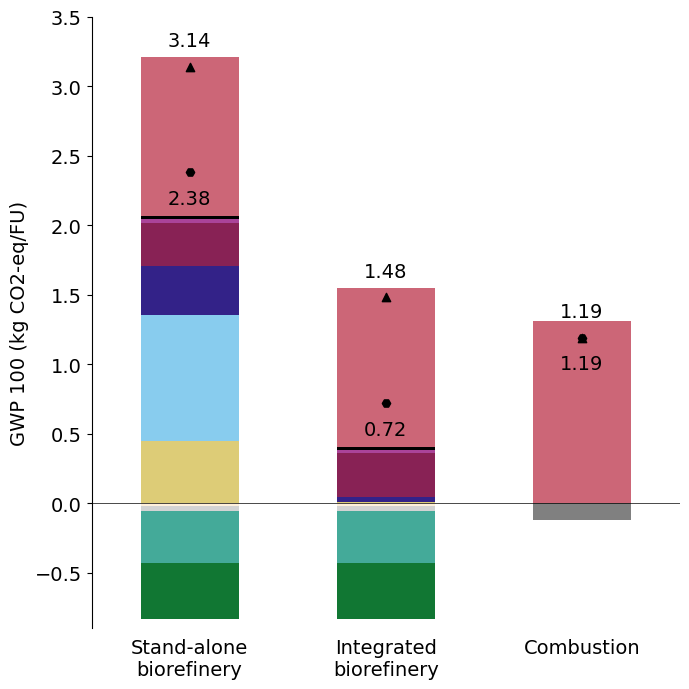

In [57]:
# transpose the dataframe
df_transposed = merged_df2.T

fig, ax = plt.subplots(figsize=(7, 7))

ax.set_ylim(-0.9,3.5)

bars = df_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors,legend = False, width=0.5)
ax.set_ylabel('GWP 100 (kg CO2-eq/FU)', fontsize=14)
#ax.legend(loc='lower center', bbox_to_anchor=(0.55, 0.7), title_fontsize='12', fontsize='14', ncol=2, frameon = False)

ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# add the single GWP100 scores for each scenario
categories_index = np.arange(len(new_names))
ax.scatter(categories_index, GWP_scores_wo_subst, color='black', marker = '^', zorder=5)
ax.scatter(categories_index, GWP_scores, color='black', marker = 'H', zorder=5)

for i, val in enumerate(GWP_scores):
    ax.text(categories_index[i], val - 0.12, f'{val}', ha='center', color='black',va = 'top', fontsize=14)

for i, val in enumerate(GWP_scores_wo_subst):
    ax.text(categories_index[i], val+0.12, f'{val}', ha='center', color='black',va = 'bottom', fontsize=14)

# +/- 0.08

plt.tight_layout()

plt.savefig(str('fig5_GWP100_results_' + ei + '.pdf'), dpi=300)

plt.show()

# 7. All impact categories calculations

The partial GWP100 scores are not added to the foreground databases. The calculations are done for the model without biogenic carbon, considering the Environmental Footprint (EF) LCIA methods. 

In [58]:
recipe_all = alg.findMethods('ReCiPe 2016 v1.03, midpoint (H)')
recipe = recipe_all[18:36] # remove all the "no LT" impact categories
recipe_noGWP = [ic for ic in recipe if 'climate change' not in ic]
len(recipe_noGWP)

17

In [59]:
# stand-alone biorefinery
df_bioref_standalone_allICs = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC,       
                             heat_residues,
                             EoL,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub
                             ],
                             recipe_noGWP,
                            # parameters
                            standalone = 1,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_RER'
                            )
df_bioref_standalone_allICs
df_bioref_standalone_allICs.to_excel(str('LCIA_bioref_standalone_allICs_'+ei+'.xlsx'))
# doesn't include GWP100 partial (is 0 for all impact categories)

In [60]:
# integrated biorefinery
df_bioref_integrated_allICs = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC, 
                             heat_residues,
                             EoL,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub],
                             recipe_noGWP,
                            # parameters
                            standalone = 0,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_RER'
                            )
df_bioref_integrated_allICs
df_bioref_integrated_allICs.to_excel(str('LCIA_bioref_integrated_allICs_'+ei+'.xlsx'))

In [61]:
df_combustion_allICs = alg.compute_impacts([combustion_model,
                            heat_CHP_bark_scaled,
                            ],
                            recipe_noGWP,
                            # parameters
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_RER'
                            )
df_combustion_allICs
df_combustion_allICs.to_excel(str('LCIA_combustion_allICs_'+ei+'.xlsx'))

## 7.1. Export table aggregated values for each scenario

In [62]:
df_bioref_standalone_allICs

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
biorefinery,-0.00285527,0.402972,0.53033,2.74175,0.264092,-0.000178326,-0.00050589,0.0587348,5.76548,0.00165078,-0.513466,-2.9973e-05,-6.03916e-07,-0.000410275,0.000834422,0.00106413,-0.0720176
lipophilic extraction,0.000713661,0.0443089,0.0546749,2.05117,0.178255,3.39375e-05,3.24153e-06,0.00982635,0.312844,0.000155276,0.257099,0.000932723,4.33387e-07,0.000263797,0.00110657,0.00121694,0.00147694
sugar extraction,0.0014223,0.0906092,0.111736,4.15888,0.356297,6.05491e-05,6.42979e-06,0.0196063,0.627158,0.000507051,0.526749,0.00188639,8.86475e-07,0.000519675,0.00195024,0.00199966,0.00277001
pulping,0.000555261,0.0203247,0.025548,1.90023,0.114628,6.01322e-05,1.10256e-05,0.00759067,0.246724,-0.00118244,0.125155,0.000556301,2.20268e-07,0.000271834,0.00060655,0.000637141,0.000921749
heat (RB),0.000184409,-0.00192361,-0.00214852,0.132295,-0.00966258,-1.94233e-07,-1.06002e-07,-0.000276995,0.05489,-5.05248e-05,-0.0148813,1.86247e-05,6.28088e-08,5.12003e-05,0.000222575,0.000223072,0.000132159
EoL,-0.00113901,0.278216,0.364159,-0.193819,-0.0407452,-0.000294224,0.000308688,0.0325555,5.41895,-0.000805605,-0.0721519,-0.000713521,1.87265e-07,-0.000373626,-0.000345091,-0.000341289,-0.00107149
tall oil (sub.),-0.000129117,-0.000805243,-0.000987633,-0.149389,-0.00473596,4.43159e-05,-5.07858e-05,-0.000790213,-0.0173471,0.00103866,-0.0237114,-5.68036e-05,-1.1551e-07,-6.06126e-05,-6.22232e-05,-6.88949e-05,-0.00107257
starch (sub.),-0.0037631,-0.0264449,-0.0208199,-3.63367,-0.0937975,-0.000165428,-0.000814844,-0.00740916,-0.85321,0.00308261,-0.373313,-0.00204177,-2.29948e-06,-0.000794472,-0.00139276,-0.00144632,-0.0686292
phenol (sub.),-0.000736381,-0.00317969,-0.00402421,-0.797864,-0.245039,-1.22696e-05,-8.72053e-07,-0.00663188,-0.0868578,0.00213557,0.00372395,-0.000194106,-1.7413e-08,-0.000264284,-0.000403773,-0.000286823,-0.007307
pulp (sub.),0.000221113,-5.72801e-05,4.38499e-05,-0.593779,-0.000770485,9.46603e-05,3.12271e-05,0.00398721,0.117214,-0.00328034,-0.957017,-0.000399187,1.01088e-07,2.74133e-05,-0.000625089,-0.000646278,0.000893974


In [63]:
df_bioref_standalone_allICs_table = df_bioref_standalone_allICs.drop(df_bioref_standalone_allICs.index[1:11])
df_bioref_standalone_allICs_table = df_bioref_standalone_allICs_table.rename(index = {'biorefinery': 'stand-alone biorefinery'})

In [64]:
df_bioref_standalone_allICs_table

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
stand-alone biorefinery,-0.00285527,0.402972,0.53033,2.74175,0.264092,-0.000178326,-0.00050589,0.0587348,5.76548,0.00165078,-0.513466,-2.9973e-05,-6.03916e-07,-0.000410275,0.000834422,0.00106413,-0.0720176


In [65]:
df_bioref_integrated_allICs_table = df_bioref_integrated_allICs.drop(df_bioref_integrated_allICs.index[1:11])
df_bioref_integrated_allICs_table = df_bioref_integrated_allICs_table.rename(index = {'biorefinery': 'integrated biorefinery'})

In [66]:
df_combustion_allICs_table = df_combustion_allICs.drop(df_combustion_allICs.index[1:2])
df_combustion_allICs_table

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
combustion,0.00102449,-0.0106867,-0.0119362,0.73497,-0.053681,-1.07907e-06,-5.88898e-07,-0.00153886,0.304944,-0.000280694,-0.0826737,0.00010347,3.48938e-07,0.000284446,0.00123653,0.00123929,0.000734219


In [67]:
merged_df_table = pd.concat([df_bioref_standalone_allICs_table, df_bioref_integrated_allICs_table, df_combustion_allICs_table], axis = 0)
merged_df_table_transposed = merged_df_table.T
merged_df_table_transposed

,stand-alone biorefinery,integrated biorefinery,combustion
acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],-0.00285527,-0.00539675,0.00102449
"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]",0.402972,0.248379,-0.0106867
"ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]",0.53033,0.339363,-0.0119362
"ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]",2.74175,-5.20955,0.73497
"energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",0.264092,-0.373467,-0.053681
eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],-0.000178326,-0.000313477,-1.07907e-06
eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],-0.00050589,-0.000522489,-5.88898e-07
"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]",0.0587348,0.0228644,-0.00153886
"human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",5.76548,4.62412,0.304944
ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],0.00165078,0.00139085,-0.000280694


In [68]:
merged_df_table_transposed.to_excel(str('aggregated_scores_'+ ei + '.xlsx'))

## 7.2. Plot graphs for a few impact categories

In [69]:
ic_dict = {
    'water consumption potential' : {'name': 'water use - water consumption potential (WCP)[cubic meter]',
                                                 'unit': 'm3-Eq',
                                                 'abbrev': 'WCP'},
    'freshwater ecotoxicity potential' : {'name': 'ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]',
                                                 'unit': 'kg 1,4-DCB-Eq',
                                                 'abbrev': 'FETP'},
    'particulate matter formation':  {'name': 'particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq]',
                                                 'unit': 'kg PM2.5-Eq',
                                                 'abbrev': 'PMFP'},
    'human toxicity potential, carcinogenics':  {'name': 'human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]',
                                                 'unit': 'kg 1,4-DCB-Eq',
                                                 'abbrev': 'HTPc'},
    'surplus ore potential' : {'name': 'material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq]',
                                                 'unit': 'kg Cu-Eq',
                                                 'abbrev': 'SOP'},
    'ionising radiation potential' : {'name': 'ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq]',
                                                 'unit': 'kg Co-60-Eq',
                                                 'abbrev': 'IRP'}
    }

    # 'freshwater eutrophication potential': {'name': 'eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq]',
    #                                              'unit': 'kg P-Eq',
    #                                              'abbrev': 'FEP'},

    # 'terrestrial acidification potential' : {'name': 'acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq]',
    #                                              'unit': 'kg SO2-Eq',
    #                                              'abbrev': 'TAP'},

In [70]:
def plot_ic (ic_name,ax):

    # get the data
    name = ic_dict[ic_name]['name']
    df_ic_col_bioref_standalone = pd.DataFrame({'Stand-alone\nbiorefinery': df_bioref_standalone_allICs[name]})
    df_ic_col_bioref_standalone_vf = df_ic_col_bioref_standalone.drop(df_ic_col_bioref_standalone.index[0])
    df_ic_col_bioref_integrated = pd.DataFrame({'Integrated\nbiorefinery': df_bioref_integrated_allICs[name]})
    df_ic_col_bioref_integrated_vf = df_ic_col_bioref_integrated.drop(df_ic_col_bioref_integrated.index[0])
    df_ic_col_combustion = pd.DataFrame({'Combustion': df_combustion_allICs[name]})
    df_ic_col_combustion_vf = df_ic_col_combustion.drop(df_ic_col_combustion.index[0])
    merged_df_table = pd.concat([df_ic_col_bioref_standalone_vf, df_ic_col_bioref_integrated_vf, df_ic_col_combustion_vf], axis = 1)
    merged_df_table = merged_df_table.rename(columns={'Stand-alone\nbiorefinery': 'Sta.', 'Integrated\nbiorefinery': 'Int.', 'Combustion': 'Com.'})
    
    # get the total scores
    total_scores = list(merged_df_table.sum())
    total_scores = ['%.4f' % elem for elem in total_scores]
    total_scores = [float(elem) for elem in total_scores] # the list items must be floats
    
    # plot the graph
    ic_abbrev = ic_dict[ic_name]['abbrev']
    ic_unit = ic_dict[ic_name]['unit']
    
    df_transposed = merged_df_table.T
    

    bars = df_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors, legend=False)
    ax.set_ylabel(str(ic_abbrev + ' (' +ic_unit+')'), fontsize=10)
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), title_fontsize='10', fontsize='10', ncol=4)
    
    ax.tick_params(axis='x', labelsize=10, rotation=0)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks
    
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # add the single GWP100 scores for each scenario
    categories_index = np.arange(len(new_names))
    ax.scatter(categories_index, total_scores, color='black', marker = 'H', zorder=5)

    import matplotlib.ticker as ticker
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-2, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_position((0.01, 1.02))
            
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    return by_label.values(), by_label.keys()

/tmp/ipykernel_16720/610049002.py:32: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  leg = fig.legend(labels,handles, loc='lower center',bbox_to_anchor=(0.5, -0.15),ncols = 6,frameon = False)
/tmp/ipykernel_16720/610049002.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_16720/610049002.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


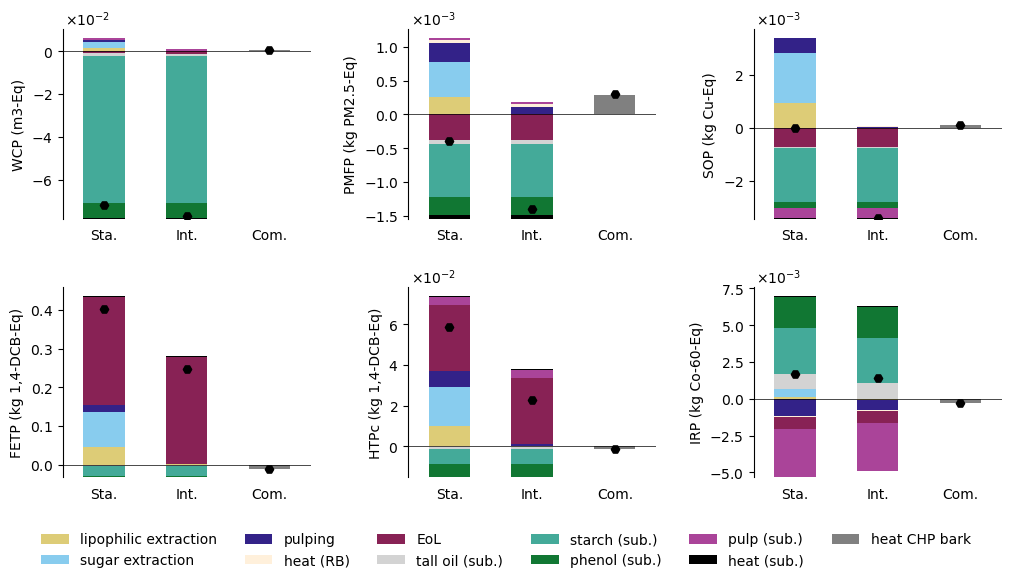

In [71]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True,figsize = (10,5))

ncols = 3
nrows = len(ic_dict.keys()) // ncols
keys = list(ic_dict.keys())

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig,hspace=0.1,wspace=0.1)

handles = []
labels = []

count = 0
for i in range(ncols):
    for j in range(nrows): # n

        ax = fig.add_subplot(spec[j, i])      

     
        plot_ic (keys[count],ax = ax)

        plt.draw()
        labels, handles = ax.get_legend_handles_labels()

        if count>0:
            handles.append(handles)
            labels.append(labels)

        count+=1
leg = fig.legend(labels,handles, loc='lower center',bbox_to_anchor=(0.5, -0.15),ncols = 6,frameon = False)

plt.tight_layout()

plt.savefig(str('fig6_lcia_' + ei + '.pdf'), dpi=300,bbox_extra_artists=[leg,], bbox_inches='tight')

plt.show()

# 8. Sensitivity analysis - biomass losses

In [72]:
df_bioref_standalone_sensitivity = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 1,
                                    percentage_losses = np.arange(-1, 1, 0.1),
                                    grid_loc = 'grid_SE',
                                    mw_loc = 'mw_SE'
                                    )
#df_bioref_standalone_sensitivity = df_bioref_standalone_sensitivity.drop(df_bioref_standalone_sensitivity.index[0])

In [73]:
df_bioref_integrated_sensitivity = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 0,
                                    percentage_losses = np.arange(-1, 1, 0.1),
                                    grid_loc = 'grid_SE',
                                    mw_loc = 'mw_SE'
                                    )
#df_bioref_integrated_sensitivity = df_bioref_integrated_sensitivity.drop(df_bioref_integrated_sensitivity.index[0])

In [74]:
df_combustion_sensitivity = alg.compute_impacts([combustion_model],
                            [ipcc2021],
                            # parameters
                            percentage_losses = np.arange(-1, 1, 0.1),
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
#df_combustion_sensitivity = df_combustion_sensitivity.drop(df_combustion_sensitivity.index[0])

In [75]:
percentage_losses = pd.DataFrame(data = np.arange(-1, 1, 0.1), columns = ['Losses'])

In [76]:
merged_df_sensitivity = pd.concat([percentage_losses, df_bioref_standalone_sensitivity, df_bioref_integrated_sensitivity, df_combustion_sensitivity], axis = 1)
merged_df_sensitivity.set_index('Losses')

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq]
Losses,,,
-1,NaN,NaN,NaN
-0.9,1.36157,-0.299177,1.18889
-0.8,1.43958,-0.221171,1.18889
-0.7,1.51758,-0.143165,1.18889
-0.6,1.59559,-0.0651597,1.18889
-0.5,1.67359,0.012846,1.18889
-0.4,1.7516,0.0908517,1.18889
-0.3,1.82961,0.168857,1.18889
-0.2,1.90761,0.246863,1.18889


In [77]:
# change the column names
new_names = ['Losses','Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
merged_df_sensitivity.columns = new_names
merged_df_sensitivity.set_index('Losses')

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
Losses,,,
-1,NaN,NaN,NaN
-0.9,1.36157,-0.299177,1.18889
-0.8,1.43958,-0.221171,1.18889
-0.7,1.51758,-0.143165,1.18889
-0.6,1.59559,-0.0651597,1.18889
-0.5,1.67359,0.012846,1.18889
-0.4,1.7516,0.0908517,1.18889
-0.3,1.82961,0.168857,1.18889
-0.2,1.90761,0.246863,1.18889


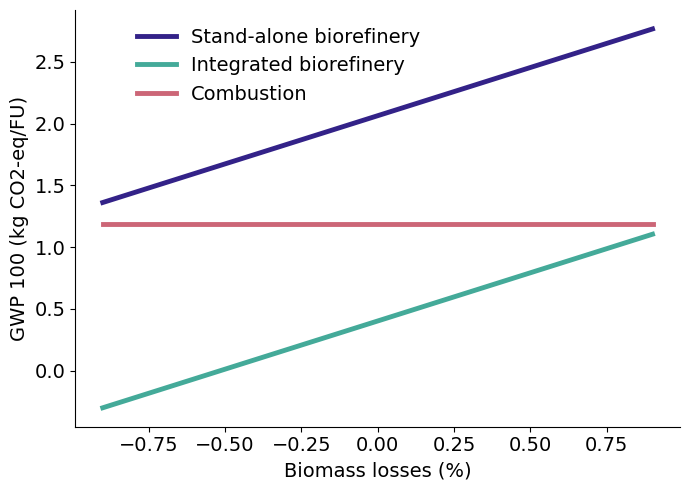

In [78]:
import matplotlib.pyplot as plt

# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

# Plot continuous lines
plt.plot(merged_df_sensitivity['Losses'], merged_df_sensitivity['Stand-alone\nbiorefinery'], 
         label='Stand-alone biorefinery', color='#332288', linestyle='-', linewidth=3.5)
plt.plot(merged_df_sensitivity['Losses'], merged_df_sensitivity['Integrated\nbiorefinery'], 
         label='Integrated biorefinery', color='#44AA99', linestyle='-', linewidth=3.5)
plt.plot(merged_df_sensitivity['Losses'], merged_df_sensitivity['Combustion'], 
         label='Combustion', color='#CC6677', linestyle='-', linewidth=3.5)

# Adding titles and labels
plt.xlabel('Biomass losses (%)', size=14)
plt.ylabel('GWP 100 (kg CO2-eq/FU)', size=14)
#plt.legend(frameon=False, fontsize=14, loc='lower center', bbox_to_anchor=(0.7, 0.48))
plt.legend(frameon=False, fontsize=14, loc='upper right', bbox_to_anchor=(0.6, 1))


# Customize axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)

# Save and show plot
plt.tight_layout()
plt.savefig('fig9_sensitivity_losses_' + ei + '.pdf')
plt.show()


# 9. Sensitivity analysis - geographical location

In [79]:
grid_list = ['grid_SE', 'grid_NO', 'grid_FI', 'grid_DK', 'grid_FR', 'grid_DE', 'grid_BE', 'grid_LU', 'grid_NL', 'grid_AT', 'grid_RER']
mw_list = ['mw_SE', 'mw_NO', 'mw_FI', 'mw_DK', 'mw_FR', 'mw_DE', 'mw_BE', 'mw_LU', 'mw_NL', 'mw_AT', 'mw_RER']
countries = ['SE','NO', 'FI', 'DK', 'FR', 'DE', 'BE', 'LU', 'NL', 'AT', 'RER']

In [80]:
df_bioref_standalone_sensitivity_loc = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 1,
                                    percentage_losses = 0,
                                    grid_loc = grid_list,
                                    mw_loc = mw_list
                                    )
df_bioref_standalone_sensitivity_loc

,,climate change - global warming potential (GWP100)[kg CO2-Eq]
grid_loc,mw_loc,
grid_SE,mw_SE,2.06362
grid_NO,mw_NO,0.85734
grid_FI,mw_FI,2.58489
grid_DK,mw_DK,0.875281
grid_FR,mw_FR,1.04416
grid_DE,mw_DE,1.72589
grid_BE,mw_BE,2.8143
grid_LU,mw_LU,3.66902
grid_NL,mw_NL,1.2886


In [81]:
df_bioref_integrated_sensitivity_loc = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 0,
                                    percentage_losses = 0,
                                    grid_loc = grid_list,
                                    mw_loc = mw_list
                                    )
df_bioref_integrated_sensitivity_loc

,,climate change - global warming potential (GWP100)[kg CO2-Eq]
grid_loc,mw_loc,
grid_SE,mw_SE,0.402875
grid_NO,mw_NO,0.521477
grid_FI,mw_FI,0.411314
grid_DK,mw_DK,0.448453
grid_FR,mw_FR,0.624386
grid_DE,mw_DE,0.412478
grid_BE,mw_BE,0.385667
grid_LU,mw_LU,0.670156
grid_NL,mw_NL,0.454782


In [82]:
df_combustion_sensitivity_loc = alg.compute_impacts([combustion_model],
                            [ipcc2021],
                            # parameters
                            percentage_losses = 0,
                            grid_loc = grid_list,
                            mw_loc = mw_list
                            )
df_combustion_sensitivity_loc

,,climate change - global warming potential (GWP100)[kg CO2-Eq]
grid_loc,mw_loc,
grid_SE,mw_SE,1.18889
grid_NO,mw_NO,1.31201
grid_FI,mw_FI,1.14124
grid_DK,mw_DK,1.30355
grid_FR,mw_FR,1.30422
grid_DE,mw_DE,1.22116
grid_BE,mw_BE,1.11753
grid_LU,mw_LU,1.06457
grid_NL,mw_NL,1.26573


In [83]:
merged_df_sensitivity_loc = pd.concat([df_bioref_standalone_sensitivity_loc, df_bioref_integrated_sensitivity_loc, df_combustion_sensitivity_loc], axis=1)

In [84]:
new_names = ['Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
merged_df_sensitivity_loc.columns = new_names
merged_df_sensitivity_loc

,,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
grid_loc,mw_loc,,,
grid_SE,mw_SE,2.06362,0.402875,1.18889
grid_NO,mw_NO,0.85734,0.521477,1.31201
grid_FI,mw_FI,2.58489,0.411314,1.14124
grid_DK,mw_DK,0.875281,0.448453,1.30355
grid_FR,mw_FR,1.04416,0.624386,1.30422
grid_DE,mw_DE,1.72589,0.412478,1.22116
grid_BE,mw_BE,2.8143,0.385667,1.11753
grid_LU,mw_LU,3.66902,0.670156,1.06457
grid_NL,mw_NL,1.2886,0.454782,1.26573


In [85]:
merged_df_sensitivity_loc = merged_df_sensitivity_loc.reset_index(drop=True)
merged_df_sensitivity_loc = merged_df_sensitivity_loc.set_index([countries])

In [86]:
merged_df_sensitivity_loc

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
SE,2.06362,0.402875,1.18889
NO,0.85734,0.521477,1.31201
FI,2.58489,0.411314,1.14124
DK,0.875281,0.448453,1.30355
FR,1.04416,0.624386,1.30422
DE,1.72589,0.412478,1.22116
BE,2.8143,0.385667,1.11753
LU,3.66902,0.670156,1.06457
NL,1.2886,0.454782,1.26573
AT,2.54968,0.415257,1.14487


In [87]:
merged_df_sensitivity_loc.index

Index(['SE', 'NO', 'FI', 'DK', 'FR', 'DE', 'BE', 'LU', 'NL', 'AT', 'RER'], dtype='object')

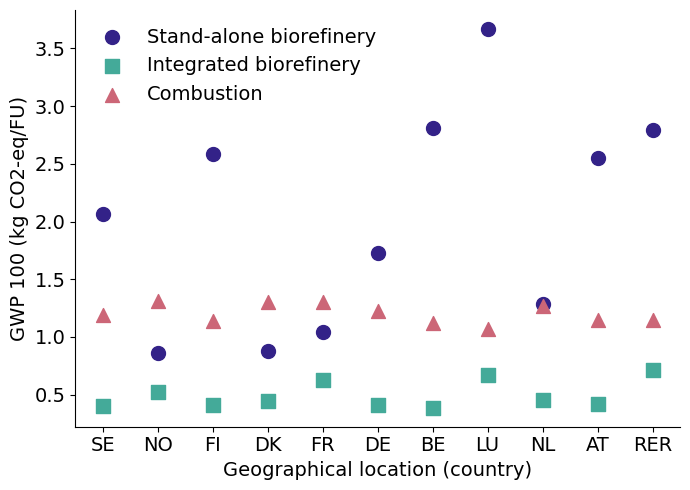

In [88]:
# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

plt.scatter(merged_df_sensitivity_loc.index, merged_df_sensitivity_loc['Stand-alone\nbiorefinery'], label='Stand-alone biorefinery', marker='o', color = '#332288', s=100)
plt.scatter(merged_df_sensitivity_loc.index, merged_df_sensitivity_loc['Integrated\nbiorefinery'], label='Integrated biorefinery', marker='s', color = '#44AA99', s=100)
plt.scatter(merged_df_sensitivity_loc.index, merged_df_sensitivity_loc['Combustion'], label='Combustion', marker='^', color = '#CC6677', s=100)

# Adding titles and labels
plt.xlabel('Geographical location (country)', size =14)
plt.ylabel('GWP 100 (kg CO2-eq/FU)', size=14)
plt.legend(frameon=False, fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)

    
plt.tight_layout()
plt.savefig(str('fig8_sensitivity_loc_' + ei +'.pdf'))

# Show plot
plt.show()

# 10. Sensitivity analysis - lifespan biorefinery products

## 10.1. Data interpolation

The characterisation factors for CO2 100 years time horizon are extracted from the ALIGNED tool. The data are plotted per year and interpolated. 

In [89]:
df = pd.read_excel('sensitivity_GWP100_lifespan.xlsx')

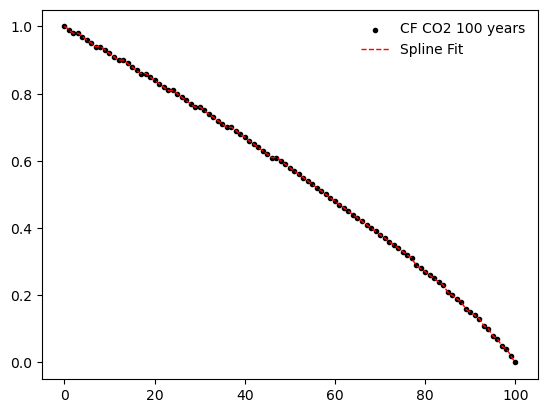

In [90]:
from scipy.interpolate import interp1d

x = df.index
y = df['CF_CO2']
f = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 100, num=100001, endpoint=True)


plt.scatter(x, y, marker = '.',label = 'CF CO2 100 years',color = 'black',zorder=1)
plt.plot(xnew, f(xnew), '--',lw = 1, label = 'Spline Fit',color = 'red',zorder=2)


plt.legend(frameon=False)
plt.show()

## 10.2 Amount of CO2 in each biorefinery product

The amounts of CO2 are fixed. However, an increase in losses in the biorefinery processes would lead to a reduction of the amount of CO2 from the main products and an increase in the amount of CO2 from the residual biomass. Here, the losses are fixed to 0 (i.e. one-at-a-time sensitivity).

In [91]:
# amount of CO2 (kg CO2-eq/FU)
amount_CO2_talloil = 15.20*44/12/1000
amount_CO2_starch = 95.97*44/12/1000
amount_CO2_phenol = 150.25*44/12/1000
amount_CO2_pulp = 175.35*44/12/1000
amount_CO2_RB = (20.46 + 41.72)*44/12/1000
amount_CO2_CHP_bark = 498.95*44/12/1000

## 10.3. Temporality of the CO2 emissions

In [92]:
# percentage of change of the lifespan of the biorefinery products
percentage_change = 0

In [93]:
# year at which the processing of bark occurs
year_zero = 35 

In [94]:
def partial_GWP100 (percentage_change, year_zero):

    # lifespan of the products
    lifespan_CHP_bark = 0 # the bark is assumed to be always burnt on year 1
    lifespan_RB = 0 + 0*percentage_change
    lifespan_talloil = 1 + 1*percentage_change
    lifespan_starch_cardboard = 1 + 1*percentage_change
    lifespan_pulp_biomed = 1 + 1*percentage_change
    lifespan_pulp_textile = 5 + 5*percentage_change
    lifespan_pulp_nanocomposite = 20 + 20*percentage_change
    lifespan_phenol_electronics = 7 + 7*percentage_change
    lifespan_phenol_auto = 13 + 13*percentage_change
    lifespan_phenol_furniture = 15 + 15*percentage_change
    lifespan_phenol_construction = 50 + 50*percentage_change
    lifespan_phenol_others = 21.25 + 21.25*percentage_change

    # years of direct CO2 emissions
    year_emission_bark = year_zero+lifespan_RB
    year_emission_RB = year_zero+lifespan_RB
    year_emission_talloil = year_zero+lifespan_talloil
    year_emission_starch_carboard = year_zero+lifespan_starch_cardboard
    year_emission_pulp_biomed = year_zero+lifespan_pulp_biomed
    year_emission_pulp_textile = year_zero+lifespan_pulp_textile
    year_emission_pulp_nanocomposite = year_zero+lifespan_pulp_nanocomposite
    year_emission_phenol_electronics = year_zero+lifespan_phenol_electronics
    year_emission_phenol_auto = year_zero+lifespan_phenol_auto
    year_emission_phenol_furniture = year_zero+lifespan_phenol_furniture
    year_emission_phenol_construction = year_zero+lifespan_phenol_construction
    year_emission_phenol_others = year_zero+lifespan_phenol_others

    # amount of CO2 emitted
    amount_emission_bark = amount_CO2_CHP_bark
    amount_emission_RB = amount_CO2_RB
    amount_emission_talloil = amount_CO2_talloil
    amount_emission_starch_carboard = amount_CO2_starch
    amount_emission_pulp_biomed = 1/3*amount_CO2_pulp
    amount_emission_pulp_textile = 1/3*amount_CO2_pulp
    amount_emission_pulp_nanocomposite = 1/3*amount_CO2_pulp
    amount_emission_phenol_electronics = 0.14*amount_CO2_phenol
    amount_emission_phenol_auto = 0.4*amount_CO2_phenol
    amount_emission_phenol_furniture = 0.18*amount_CO2_phenol
    amount_emission_phenol_construction = 0.23*amount_CO2_phenol
    amount_emission_phenol_others = 0.05*amount_CO2_phenol

    # calculation partial GWP100
    GWP_bark = f(year_emission_bark)*amount_emission_bark
    GWP_RB = f(year_emission_RB)*amount_emission_RB
    GWP_talloil = f(year_emission_talloil)*amount_emission_talloil
    GWP_starch_cardboard = f(year_emission_starch_carboard)*amount_emission_starch_carboard
    GWP_pulp_biomed = f(year_emission_pulp_biomed)*amount_emission_pulp_biomed
    GWP_pulp_textile = f(year_emission_pulp_textile)*amount_emission_pulp_textile
    GWP_pulp_nanocomposite = f(year_emission_pulp_nanocomposite)*amount_emission_pulp_nanocomposite
    GWP_phenol_electronics = f(year_emission_phenol_electronics)*amount_emission_phenol_electronics
    GWP_phenol_auto = f(year_emission_phenol_auto)*amount_emission_phenol_auto
    GWP_phenol_furniture = f(year_emission_phenol_furniture)*amount_emission_phenol_furniture
    GWP_phenol_construction = f(year_emission_phenol_construction)*amount_emission_phenol_construction
    GWP_phenol_others = f(year_emission_phenol_others)*amount_emission_phenol_others

    partial_GWP_bioref = GWP_RB + GWP_talloil + GWP_starch_cardboard + GWP_pulp_biomed + GWP_pulp_textile + GWP_pulp_nanocomposite + GWP_phenol_electronics + GWP_phenol_auto + GWP_phenol_furniture + GWP_phenol_construction +  GWP_phenol_others
    partial_GWP_combustion = GWP_bark

    # plot the emissions vs year + straight line for GWP100  (replace excel plot)    

    return partial_GWP_bioref, partial_GWP_combustion

In [95]:
partial_GWP_bioref, partial_GWP_combustion = partial_GWP100 (percentage_change, year_zero)

In [96]:
### plot sensitivity graph GWP100 for different values of percentage change
percentage_change_list = np.arange(0, 0.3,0.01).tolist()
partial_GWP_bioref_list = []
partial_GWP_combustion_list = []

for value in percentage_change_list:
    partial_GWP_bioref, partial_GWP_combustion = partial_GWP100 (value, year_zero)
    partial_GWP_bioref_list.append(partial_GWP_bioref)
    partial_GWP_combustion_list.append(partial_GWP_combustion)

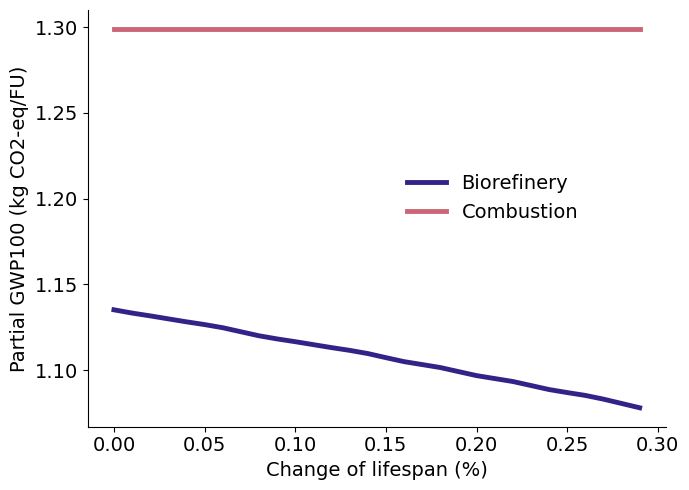

In [97]:
import matplotlib.pyplot as plt

# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

# Plot continuous lines
plt.plot(percentage_change_list, partial_GWP_bioref_list, 
         label='Biorefinery', color='#332288', linestyle='-', linewidth=3.5)
plt.plot(percentage_change_list, partial_GWP_combustion_list, 
         label='Combustion', color='#CC6677', linestyle='-', linewidth=3.5)

# Adding titles and labels
plt.xlabel('Change of lifespan (%)', size=14)
plt.ylabel('Partial GWP100 (kg CO2-eq/FU)', size=14)
plt.legend(frameon=False, fontsize=14, loc='lower center', bbox_to_anchor=(0.7, 0.45))

# Customize axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)

# Save and show plot
plt.tight_layout()
plt.savefig('fig7_sensitivity_lifespan_' + ei + '.pdf')
plt.show()


# 11. Sensitivity to the background data

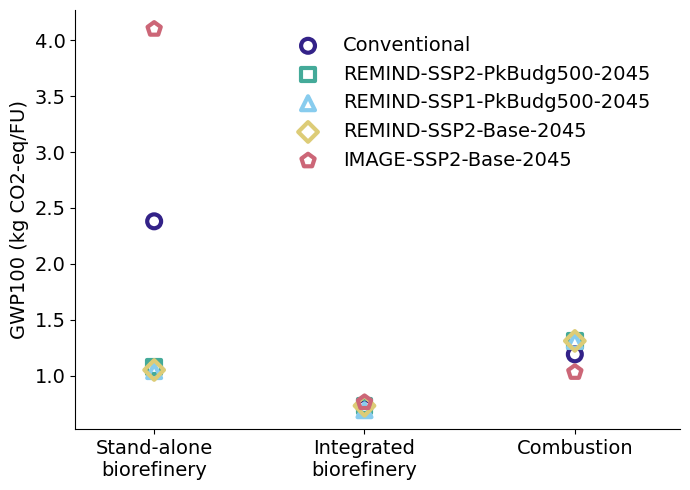

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Data
scenarios = ['Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
models = [
    'Conventional', 
    'REMIND-SSP2-PkBudg500-2045', 
    'REMIND-SSP1-PkBudg500-2045', 
    'REMIND-SSP2-Base-2045', 
    'IMAGE-SSP2-Base-2045'
]
values = {
    'Stand-alone\nbiorefinery': [2.38, 1.08, 1.04, 1.05, 4.10],
    'Integrated\nbiorefinery': [0.72, 0.73, 0.69, 0.73, 0.76],
    'Combustion': [1.19, 1.31, 1.31, 1.31, 1.03]
}

# Marker styles and colors for different models
markers = ['o', 's', '^', 'D', 'p']
colors = ['#332288', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677']

# Create figure and axis
fig, ax = plt.subplots(figsize=(7,5))

# Set the positions of the x-ticks with reduced spacing
x_positions = (np.arange(len(scenarios))*4)  # Reduced spacing

# Plotting data points for each model in all scenarios
for j, model in enumerate(models):
    x_coords = []
    y_coords = []
    for i, scenario in enumerate(scenarios):
        x_coords.append(x_positions[i])  # Adjusted x-axis position
        y_coords.append(values[scenario][j])  # Corresponding y-value for the model

    # Plot each model with a unique marker and color
    plt.scatter(x_coords, y_coords, marker=markers[j], facecolor = 'None',edgecolor=colors[j], s=100, label=model, linewidths=3)
    #plt.scatter(x_coords, y_coords, marker=markers[j], color=colors[j], s=100, label=model)

# Set labels and title#
plt.xticks(ticks=x_positions, labels=scenarios, size=14)
ax.set_xlim(-1.5,10)
#plt.xlabel("Scenarios")
plt.ylabel("GWP100 (kg CO2-eq/FU)", size = 14)
#plt.title("Scatter Plot of Different Scenarios and Models")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)

# Add legend for models, with a smaller font size and adjusted position
plt.legend(frameon=False,bbox_to_anchor=(0.98, 0.98), loc='upper right', fontsize=14)

# Show grid
#plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()

plt.savefig('fig10_sensitivity_background_' + ei + '.pdf')

# Show the plot
plt.show()